In [1]:
# Predicting bike sharing count using machine learning

In [2]:
# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

In [3]:
import pandas as pd
import numpy as np

# Load Dataset

In [4]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Preprocessing

In [7]:
# preprocessing datetime by separating year, month, day, and hour (minutes and seconds are all 0s so ignore them)
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour

# day of the week: Monday(1), Tuesday(2)... Sunday(7)
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train.head()

(10886, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [8]:
# Make day of week more understandable to humans
# 1 == Monday, 2 == Tuesday ... 7 = Sunday
train.loc[train["datetime-dayofweek"]==0, "datetime-dayofweek(human)"] = "Monday"
train.loc[train["datetime-dayofweek"]==1, "datetime-dayofweek(human)"] = "Tuesday"
train.loc[train["datetime-dayofweek"]==2, "datetime-dayofweek(human)"] = "Wednesday"
train.loc[train["datetime-dayofweek"]==3, "datetime-dayofweek(human)"] = "Thursday"
train.loc[train["datetime-dayofweek"]==4, "datetime-dayofweek(human)"] = "Friday"
train.loc[train["datetime-dayofweek"]==5, "datetime-dayofweek(human)"] = "Saturday"
train.loc[train["datetime-dayofweek"]==6, "datetime-dayofweek(human)"] = "Sunday"

print(train.shape)
train[["datetime-dayofweek", "datetime-dayofweek(human)"]].head()

(10886, 18)


,datetime-dayofweek,datetime-dayofweek(human)
0,5,Saturday
1,5,Saturday
2,5,Saturday
3,5,Saturday
4,5,Saturday


In [9]:
# Do the same for test dataset
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test.head()

(6493, 14)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


In [10]:
test.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(human)"] = "Monday"
test.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(human)"] = "Tuesday"
test.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(human)"] = "Wednesday"
test.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(human)"] = "Thursday"
test.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(human)"] = "Friday"
test.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(human)"] = "Saturday"
test.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(human)"] = "Sunday"

print(test.shape)
test[["datetime-dayofweek", "datetime-dayofweek(human)"]].head()

(6493, 15)


,datetime-dayofweek,datetime-dayofweek(human)
0,3,Thursday
1,3,Thursday
2,3,Thursday
3,3,Thursday
4,3,Thursday


In [11]:
# Temperature Humidity Index (THI) is a measure that calculates heat stress
# This information can be beneficial for this project as high THI can mean low bike rental count
train["THI"] = ((9/5)*train["temp"])-(0.55*(1-(0.01*train["humidity"]))*((9/5)*train["temp"]-26))+32
print(train.shape)

train.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-dayofweek(human),THI
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,Saturday,50.578096
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,Saturday,49.310040
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,Saturday,49.310040
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,Saturday,50.851600
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,Saturday,50.851600


In [12]:
test["THI"] = ((9/5)*test["temp"])-(0.55*(1-(0.01*test["humidity"]))*((9/5)*test["temp"]-26))+32
print(test.shape)

test.head()

(6493, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-dayofweek(human),THI
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3,Thursday,52.836504
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3,Thursday,52.836504
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3,Thursday,52.836504
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,Thursday,52.836504
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3,Thursday,52.836504


# Explore

In [13]:
# visualize using seaborn and matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

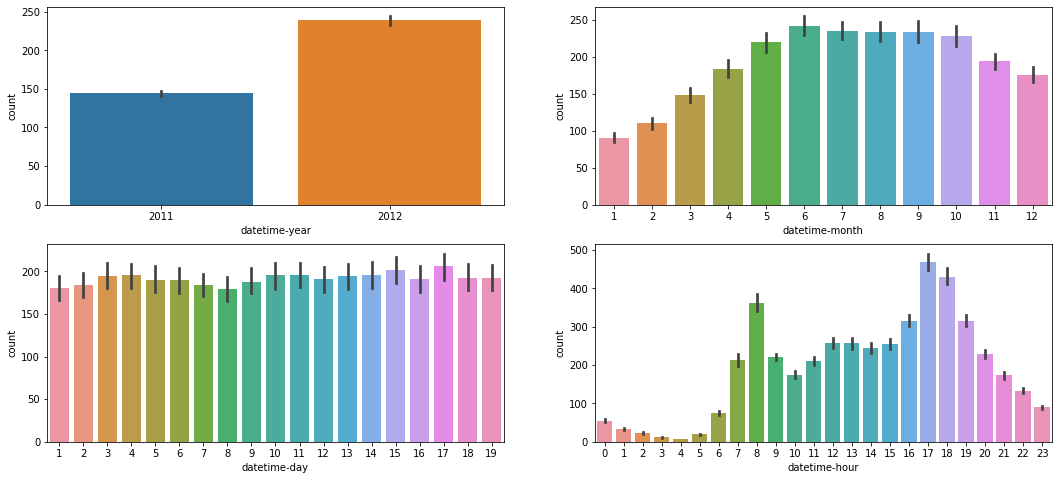

In [14]:
# show multiple plots
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18,8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)

#### datetime-year
* number increase --> company is growing

#### datetime-month
* number increases during spring and summer and decreases during winter
* can be misleading information. Why is december almost double then january? 

#### datetime-day
* No significant change in numbers

#### datetime-hour
* high count in the morning when people go to work
* high count around 5-7 pm when people get out of work to go home
* very low count early in the morning

In [15]:
# because month itself can be misleading information. So, combine year and month to be more accurate
# convert int to str
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

train["datetime-year-month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

print(train.shape)
train[["datetime", "datetime-year-month"]].head()

(10886, 22)


,datetime,datetime-year-month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


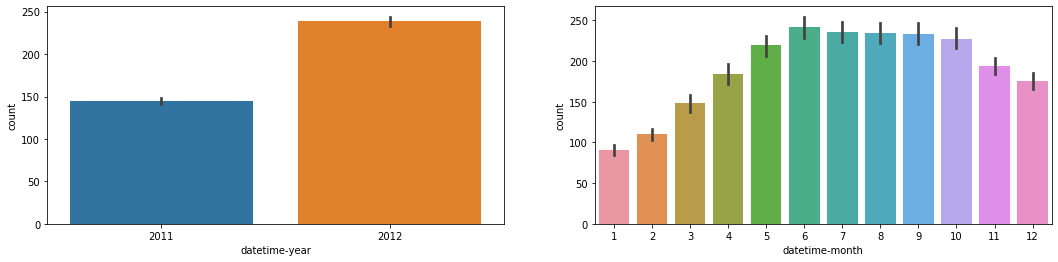

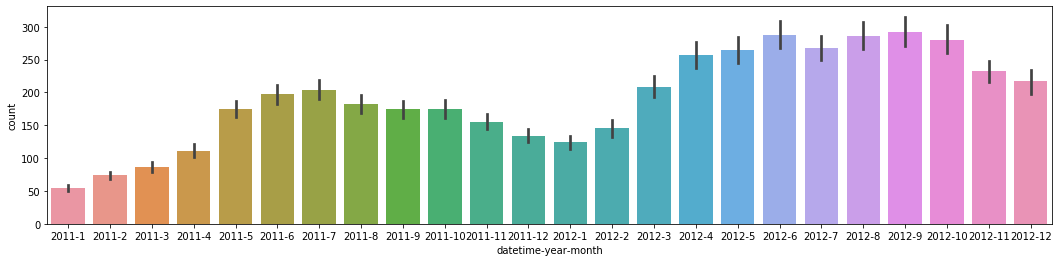

In [16]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="datetime-year-month", y="count", ax=ax3)

* between 2011-1 and 2011-12 the count almost doubles, but it is not because of the month. It is because the company is growing
* datetime-month should not be used as one of the features

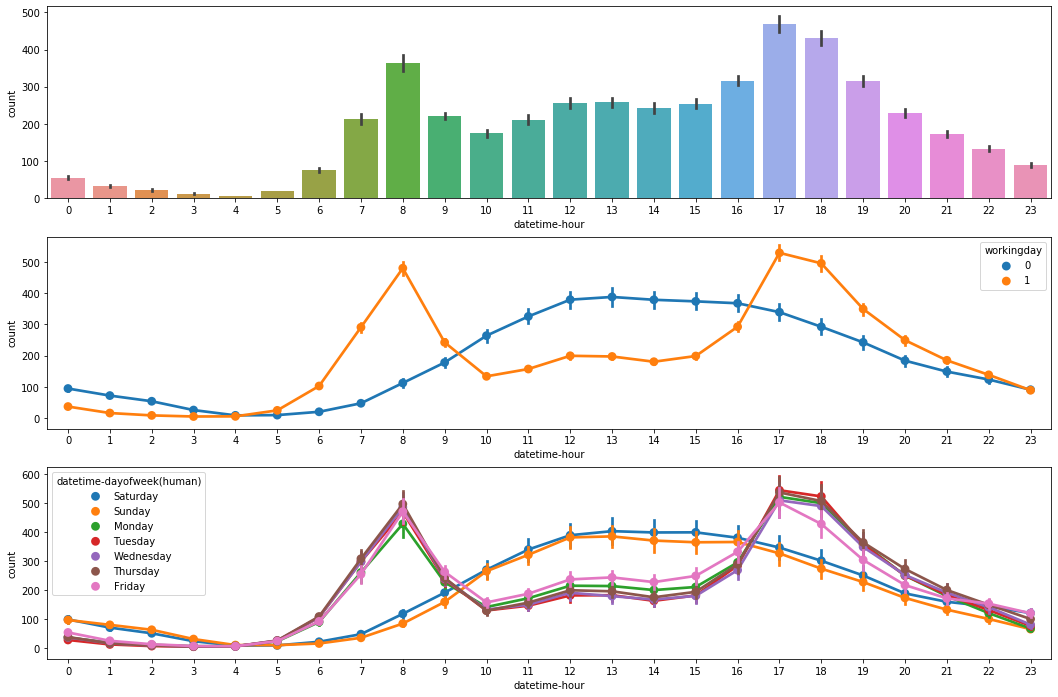

In [17]:
# visualizing workingday and dayofweek
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,12)

# datetime-hour vs count
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax1)

#datetime-hour vs count in workingday
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

#datetime-hour vs count in dayofweek
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(human)", ax=ax3)

* 2nd plot: for non-workingday (workingday==0), count is high between 10 am to 7 pm
* 3rd plot: On Friday, count is slightly less than rest of the week between 17:00 and 22:00. 
    * What this means: people do not go straight to home after work on Fridays (drinks and gatherings)
* On Sunday, count is lower than Saturday
    * People go to work on Mondays, so they tend to rest on Sundays compared to on Saturdays

* Overall, dayofweek column can be significant --> can be used as one of the features

# Train

In [18]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek", "THI"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek',
 'THI']

In [19]:
label_name = "count"
label_name

'count'

In [20]:
X_train = train[feature_names]
print(X_train.shape)

X_train.head()

(10886, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek,THI
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5,50.578096
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5,49.310040
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5,49.310040
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5,50.851600
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5,50.851600


In [21]:
X_test = test[feature_names]
print(X_test.shape)

X_test.head()

(6493, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek,THI
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3,52.836504
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,52.836504
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3,52.836504
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3,52.836504
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3,52.836504


In [22]:
y_train = train[label_name]
print(y_train.shape)

y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

## Use RandomForest

In [23]:
# use scikit-learn 
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_jobs=-1, random_state= 42, n_estimators = 1000)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## Fit

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## Predict

In [25]:
# Predict the count
predictions = model.predict(X_test)
print(predictions.shape)

predictions

(6493,)


array([ 11.76      ,   4.942     ,   4.88066667, ..., 104.63466667,
       100.651225  ,  47.5375    ])

## Submission

In [26]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [27]:
submission["count"] = predictions
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.760000
1,2011-01-20 01:00:00,4.942000
2,2011-01-20 02:00:00,4.880667
3,2011-01-20 03:00:00,3.357000
4,2011-01-20 04:00:00,2.772000


In [28]:
submission.to_csv("bike-sharing-machinelearning.csv", index=False)